1. 删除重复数据，并输出去重前后的数据量理

In [71]:
import pandas as pd
raw_data = pd.read_csv('C:\\Users\\任雪宁\\Desktop\\github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]
print(f"去重前的数据量: {len(data)}")
data_unique = data.drop_duplicates()
print(f"去重后的数据量: {len(data_unique)}")
data_unique.to_csv('C:\\Users\\任雪宁\\Desktop\\github_bot_unique_data.csv', index=False)

去重前的数据量: 20358
去重后的数据量: 19779



2. 缺失值处
首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
最后，再次看各列有无缺失值理

In [73]:
import numpy as np
import pandas as pd
raw_data = pd.read_csv('C:\\Users\\任雪宁\\Desktop\\github_bot_unique_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]
if 'gravatar_id' in data.columns:
    data = data.drop(columns=['gravatar_id'])
print("Initial missing values in each column:")
print(data.isnull().sum())
boolean_columns = ['company', 'location', 'blog','email','hireable','bio','twitter_username','gravatar_id','site_admin']
for col in boolean_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce').notnull().astype(bool)
text_columns = ['actor_id','label','login','id','node_id','avatar_url','gravatar_id','url','html_url','followers_url','following_url','gists_url','starred_url','subscriptions_url','organizations_url','repos_url','events_url','received_events_url','type','site_admin', 'name','company','blog','location','email','hireable','bio','twitter_username','public_repos','public_gists','followers','following',  'created_at','updated_at']
for col in text_columns:
    if col in data.columns:
        data[col] = data[col].fillna('')
print("\nFinal missing values in each column after processing:")
print(data.isnull().sum())
data.to_csv('C:\\Users\\任雪宁\\Desktop\\github_bot_unique_data.csv', index=False)

Initial missing values in each column:
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtyp

3. 数据变换，将created_at、updated_at转为时间戳

In [75]:
import pandas as pd
raw_data = pd.read_csv('C:\\Users\\任雪宁\\Desktop\\github_bot_unique_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])
 
# 如果时间戳是 UTC，或者您不关心时区差异，可以直接使用以下方法来计算 UNIX 时间戳
data['created_at_timestamp'] = (data['created_at'].astype('int64') // 10**9)
data['updated_at_timestamp'] = (data['updated_at'].astype('int64') // 10**9)
# 打印包含原始日期时间和时间戳的列的前几行
print(data[['created_at', 'updated_at', 'created_at_timestamp', 'updated_at_timestamp']].head())


                 created_at                updated_at  created_at_timestamp  \
0 2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00            1317058023   
1 2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00            1435572766   
2 2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+00:00            1220026803   
3 2014-05-20 18:43:09+00:00 2023-10-12 12:54:59+00:00            1400611389   
4 2012-08-16 14:19:13+00:00 2023-10-06 11:58:41+00:00            1345126753   

   updated_at_timestamp  
0            1697196070  
1            1696659974  
2            1696212681  
3            1697115299  
4            1696593521  


4. 数据可视化
4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

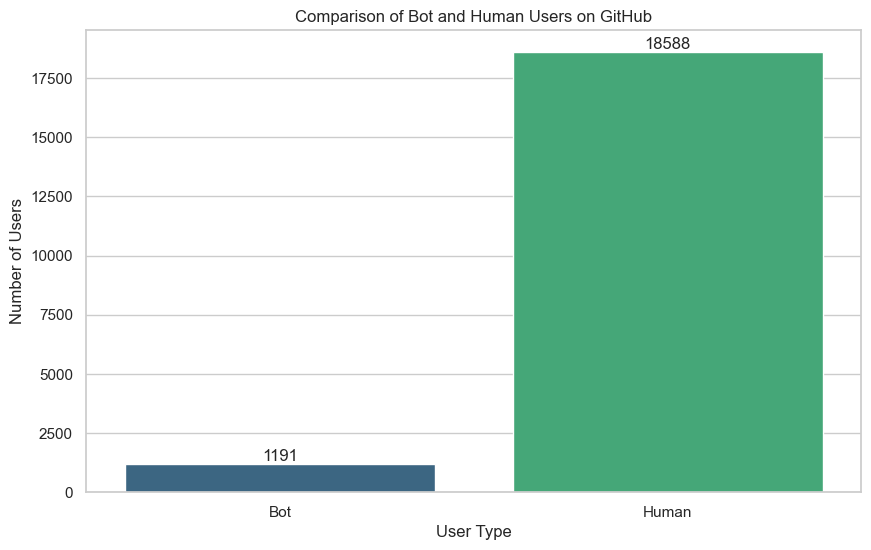

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
raw_data = pd.read_csv('C:\\Users\\任雪宁\\Desktop\\github_bot_unique_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]
bot_count = data[data['label'] == 'Bot'].shape[0]
human_count = data[data['label'] == 'Human'].shape[0]
labels = ['Bot', 'Human']
counts = [bot_count, human_count]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=labels, y=counts, palette="viridis")
plt.title('Comparison of Bot and Human Users on GitHub')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
for index, value in enumerate(counts):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')
plt.show()

选择原因：
柱状图可以展示不同类别在总体中的占比，同时突出它们之间的相对大小和关系。
结果分析：
我们看到两个结果相差非常的大，相差超过15倍。
数据洞察：
真人占比远超过机器人，可信度较高。洞。调查

4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

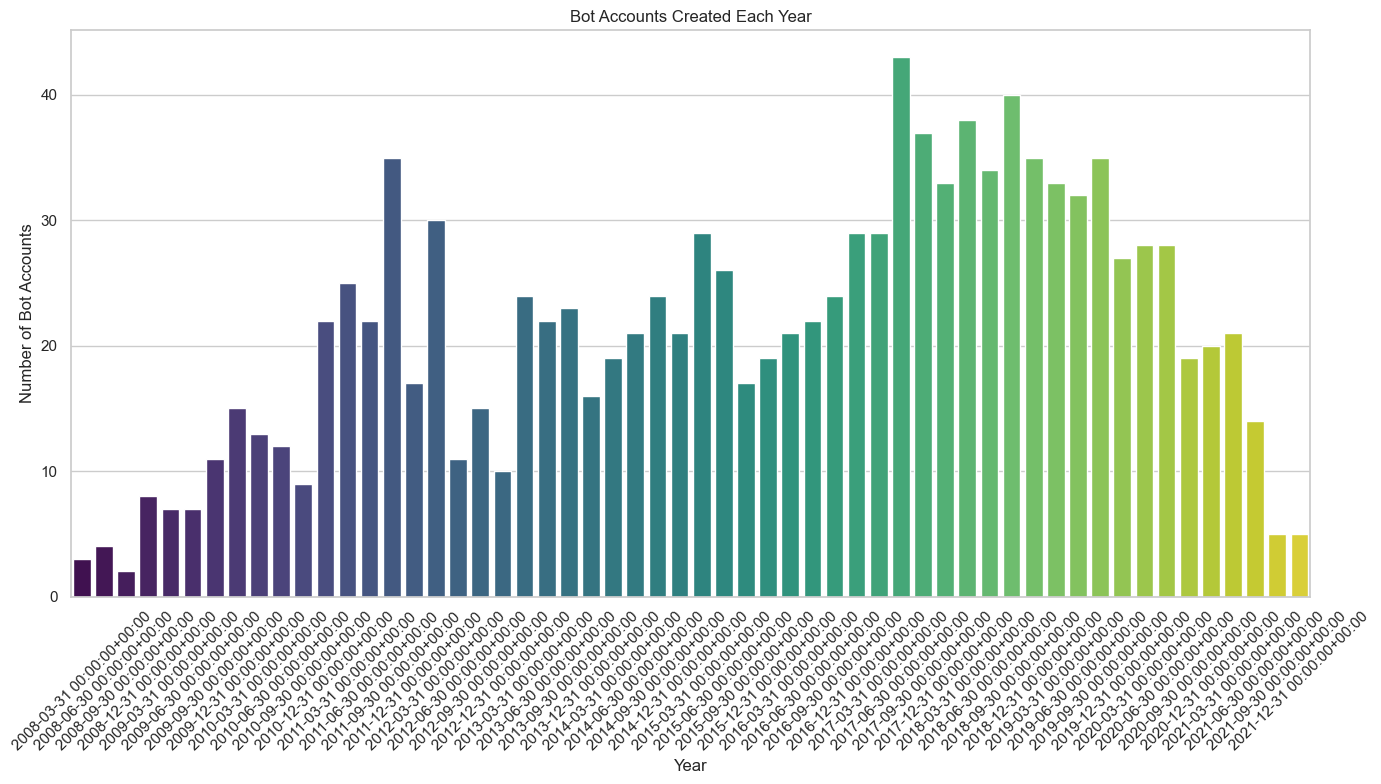

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
columns = [
    'label', 
    'created_at', 
]
data = raw_data[columns]
bot_data = data[data['label'] == 'Bot'].copy()
bot_data['created_at'] = pd.to_datetime(bot_data['created_at'])
bot_data_by_year = bot_data.groupby(pd.Grouper(key='created_at', freq='Q')).size().reset_index(name='count')
plt.figure(figsize=(14, 8))
sns.barplot(x='created_at', y='count', data=bot_data_by_year, palette='viridis')
plt.title('Bot Accounts Created Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Bot Accounts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

选择原因：
选择直方图并按照时间进行划分，我们可以观察到bot账号的增长趋势、变化情况。
结果分析：
当某一年份的bot账号数量显著增加，这可能意味着这一年有某种因素促进了bot账号的创建。比如2011年末以及2018年
数据洞察：
当bot被创建数量快速增加时，可能是网站的自动化加强，或者有很多新的功能被建立。

4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

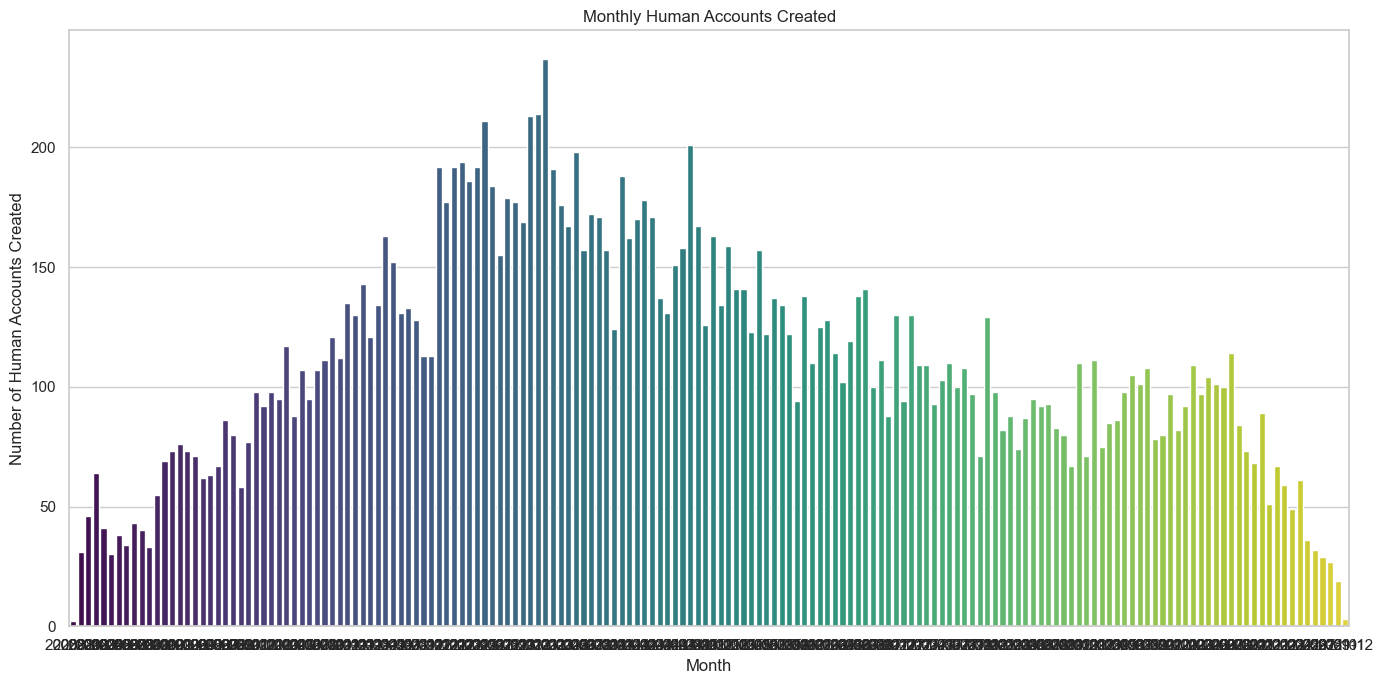

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    raw_data = pd.read_csv('C:\\Users\\任雪宁\\Desktop\\github_bot_unique_data.csv')
except FileNotFoundError:
    print("文件未找到，请检查文件路径是否正确。")
    raise
columns = ['actor_id', 'label', 'created_at']
data = raw_data[columns]
human_data = data[data['label'] == 'Human'].copy()
try:
    human_data['created_at'] = pd.to_datetime(human_data['created_at'])
except ValueError as e:
    print(f"转换日期时间格式时出错: {e}")
    raise
human_data_by_month = human_data.groupby(human_data['created_at'].dt.tz_localize(None).dt.to_period('M')).size().reset_index(name='count')
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
sns.barplot(x='created_at', y='count', data=human_data_by_month, palette='viridis')
plt.title('Monthly Human Accounts Created')
plt.xlabel('Month')
plt.ylabel('Number of Human Accounts Created')
plt.tight_layout()
plt.show()

选择原因：
选择直方图，可以很好反应该变化趋势，按照时间顺序展现一定规律。
结果分析：
我们看到整体趋势说先增加后减少，且增加的特别快，最后小幅度上升。
数据洞察：
通过变化可以显示出，这可能是在上升顶峰的时间段内，该平台进行了宣传，增加了许多新用户，提高了影响力。

4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

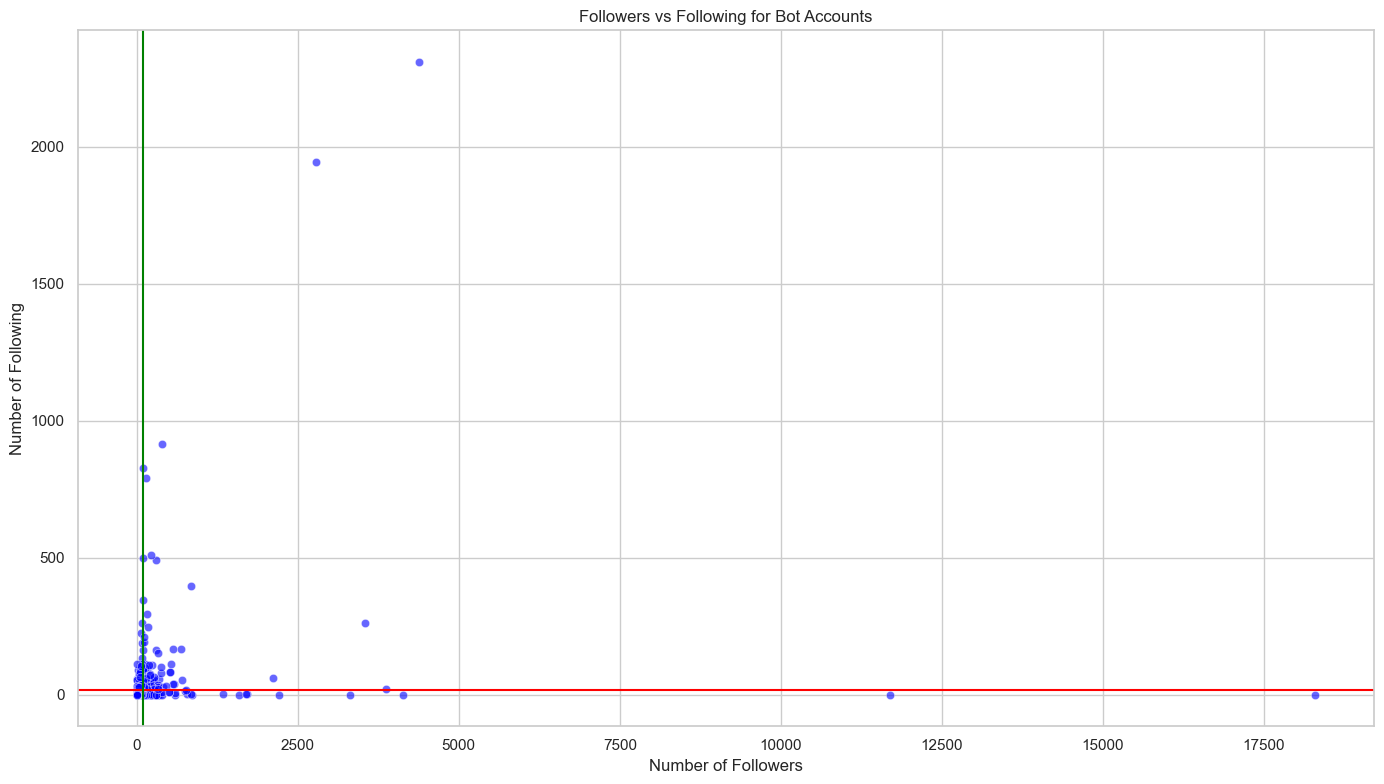

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
columns = [
    'label', 
    'followers',
    'following'
]
data = raw_data[columns]
bot_data = data[data['label'] == 'Bot'].copy()
plt.figure(figsize=(14, 8))
sns.scatterplot(x='followers', y='following', data=bot_data, alpha=0.6, color='blue')
plt.title('Followers vs Following for Bot Accounts')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Following')
plt.axhline(y=bot_data['following'].mean(), color='red', linestyle='-') 
plt.axvline(x=bot_data['followers'].mean(), color='green', linestyle='-') 
plt.grid(True)
plt.tight_layout()
plt.show()

选择原因：
选择散点图是因为它可以很好展示两个变量之间的关系，特别是他们是否存在相关性或某种趋势。
结果分析：
我们发现，散点集中在左下角。
数据洞察：
这说明，对于bot来说，它的关注对象以及跟随者都非常少，这是很正常的现象，一般会跟随真人。

4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

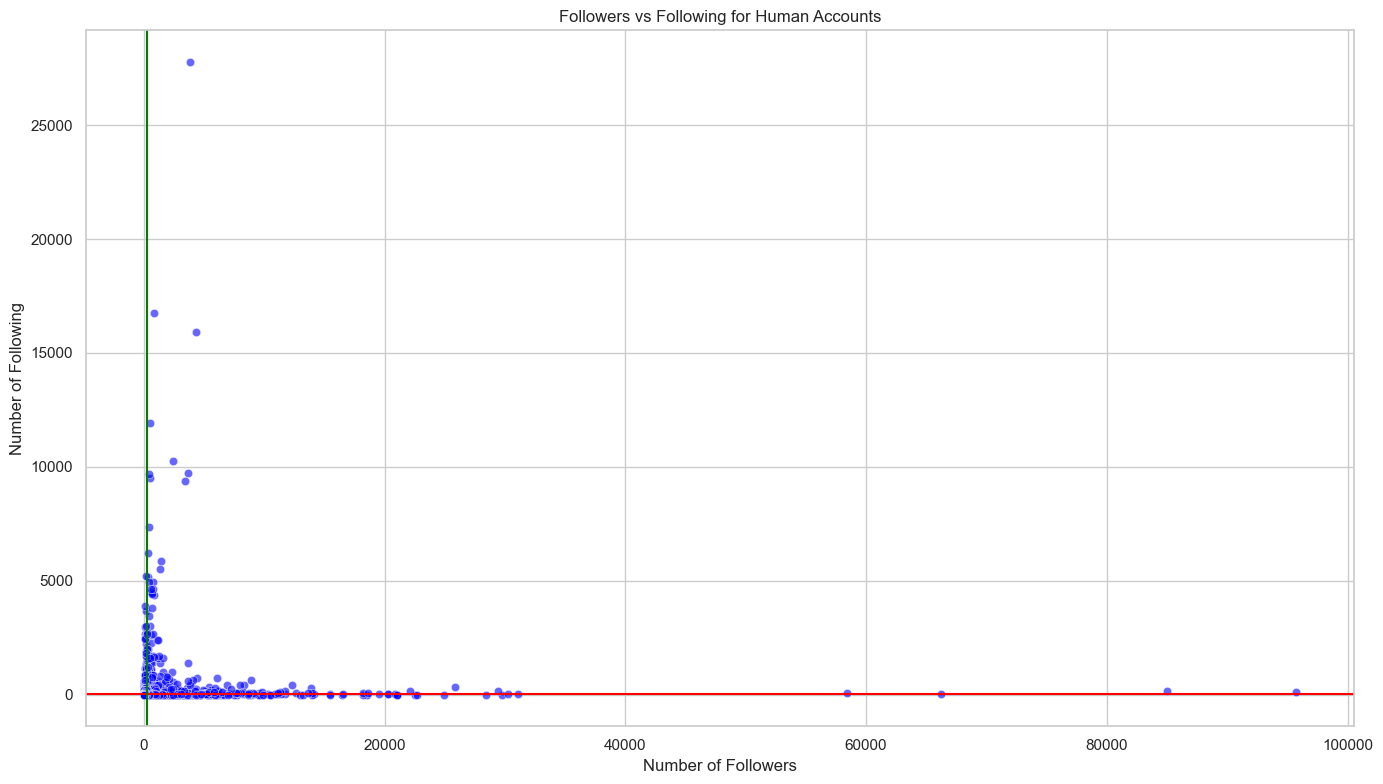

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
columns = [
    'label', 
    'followers',
    'following'
]
data = raw_data[columns]
bot_data = data[data['label'] == 'Human'].copy()
plt.figure(figsize=(14, 8))
sns.scatterplot(x='followers', y='following', data=bot_data, alpha=0.6, color='blue')
plt.title('Followers vs Following for Human Accounts')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Following')
plt.axhline(y=bot_data['following'].mean(), color='red', linestyle='-') 
plt.axvline(x=bot_data['followers'].mean(), color='green', linestyle='-') 
plt.grid(True)
plt.tight_layout()
plt.show()

选择原因：
选择散点图是因为它可以很好展示两个变量之间的关系，特别是他们是否存在相关性或某种趋势。
结果分析：
我们发现，散点集中在左下角。但是followers明显增多。
数据洞察：
相较于bot，这个值增加非常明显。活跃度远高于bot，可见human的影响力要高于bot。